# Question 1


##Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn import preprocessing
from sklearn import metrics, linear_model, neighbors, model_selection
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures,label_binarize,PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve,auc
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
%matplotlib inline
warnings.filterwarnings('ignore')

#model regression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

#model classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

##Load data

In [ ]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=';')
white_wine = pd.read_csv("winequality-white.csv", delimiter=';')
red_wine['color'] = 'red'
white_wine['color'] = 'white'
df = pd.concat([red_wine, white_wine], ignore_index=True)
df.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


###Statistics of data characteristics

In [ ]:
#check colums
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

**About the dataset**

**Numerical Attributes:**

* **Fixed Acidity**: Fixed acidity level of the wine (numeric).

* **Volatile Acidity**: Volatile acidity level (numeric).

* **Citric Acid**: Citric acid content (numeric).

* **Residual Sugar**: Amount of residual sugar (numeric).

* **Chlorides**: Chloride content (numeric).

* **Free Sulfur Dioxide**: Amount of free sulfur dioxide (numeric).

* **Total Sulfur Dioxide**: Total amount of sulfur dioxide (numeric).

* **Density**: Density of the wine (numeric).

* **pH**: pH level of the wine (numeric).

* **Alcohol**: Alcohol content (numeric).
* **Quality**: Quality of the wine (numeric), rated from 0 to 10.

**Categorical Attribute:**

* **Color**: Color of the wine (string),red or white.



###Check unique data for each feature in the dataFrame

In [ ]:
df.nunique()

,0
fixed acidity,106
volatile acidity,187
citric acid,89
residual sugar,316
chlorides,214
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,108
sulphates,111


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Observation:**

* We can see that the all columns do not contain null values

In [ ]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##Data visualization

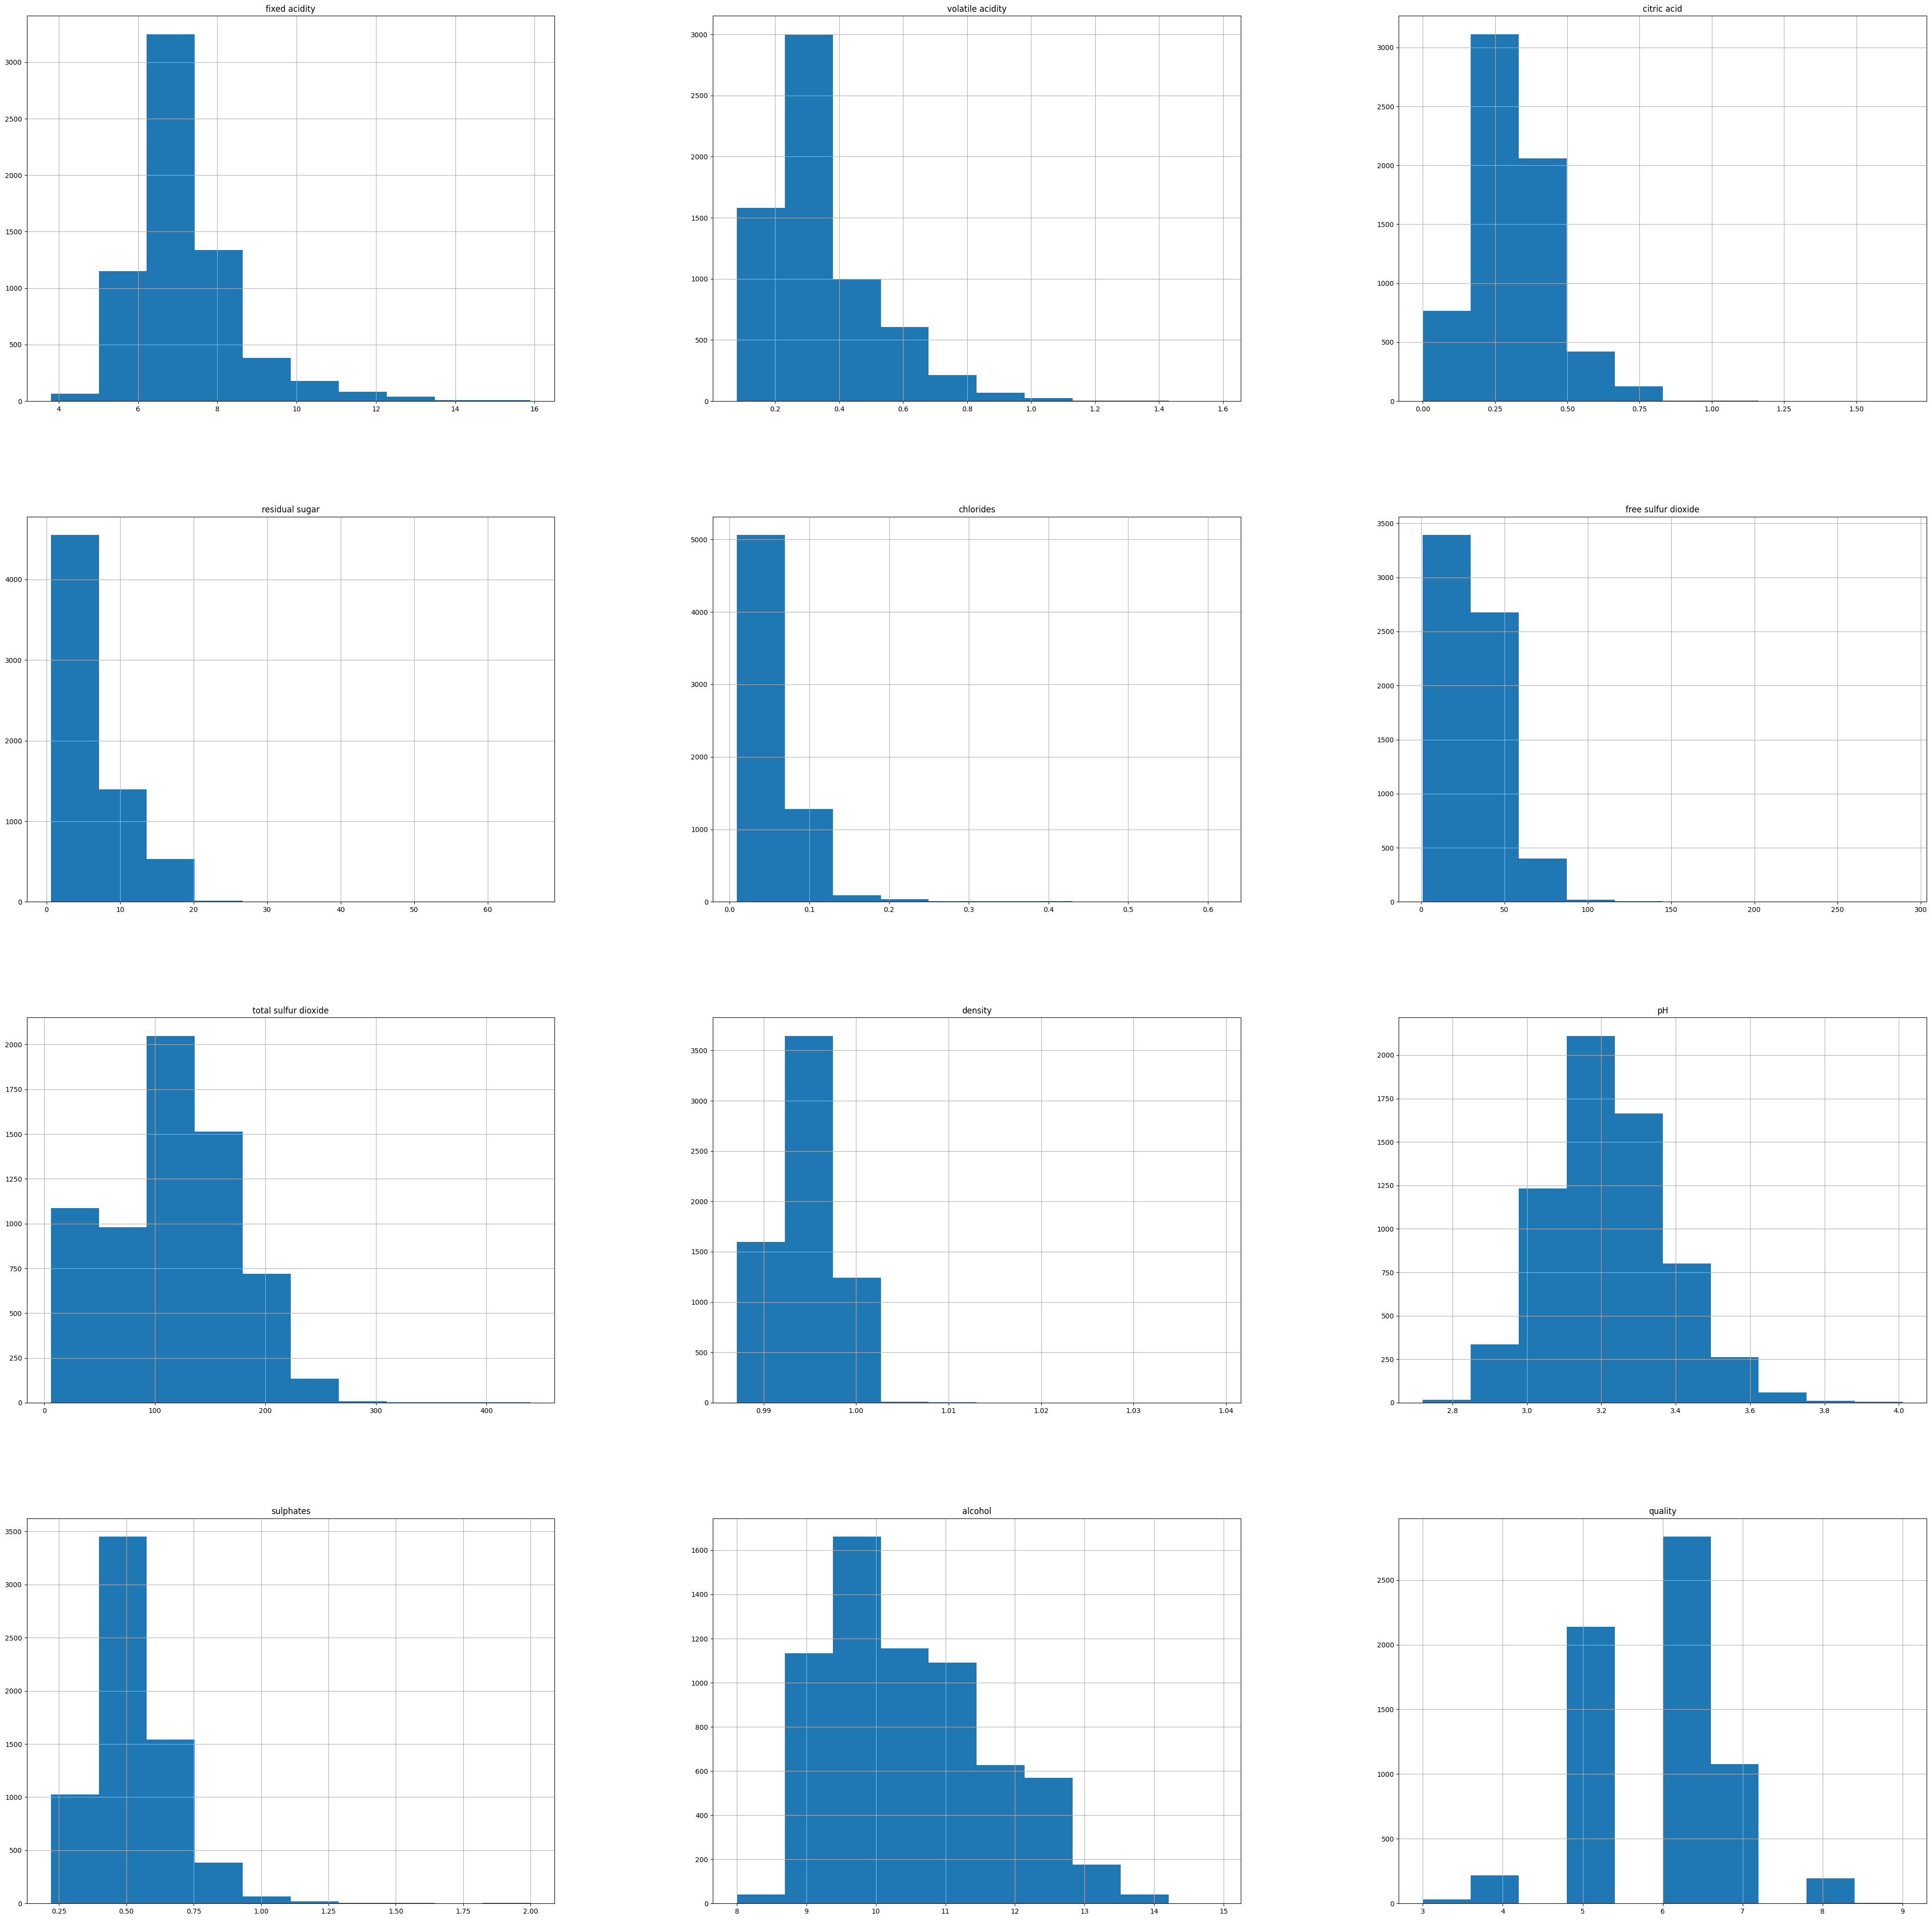

In [ ]:
df.hist(bins=10, figsize=(50,50))
plt.show()

##Data preprocessing.

###Check dublicates

In [ ]:
df.duplicated().sum()


1177

###Drop them

In [ ]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()


0

###Handling missing values

In [ ]:
#Check null values
df.isnull().sum()
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [ ]:
#replace with the default value if there's a null value
df.fillna(0, inplace=True)

###Convert data type


In [ ]:
label_encoder = LabelEncoder()


df['color'] = label_encoder.fit_transform(df['color'])
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0


###Correlation feature and drop

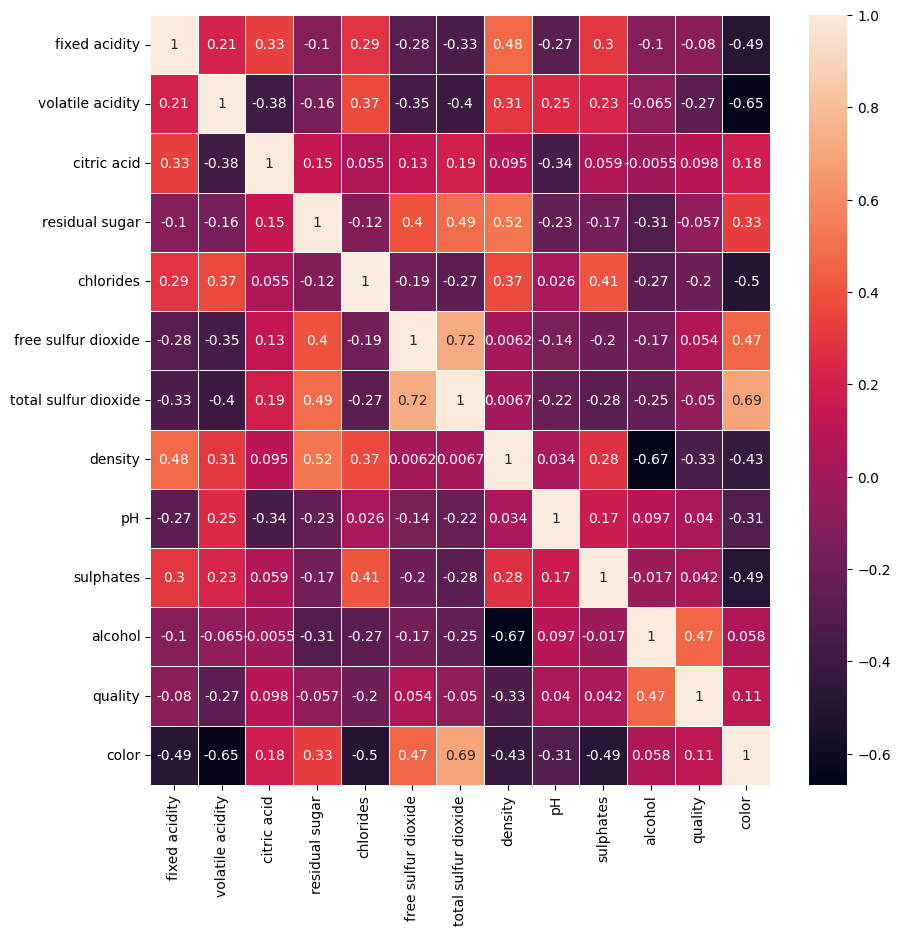

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,ax=ax)
plt.show()

In [ ]:
corr_matrix['quality'].sort_values(ascending=False)


,quality
quality,1.000000
alcohol,0.469422
color,0.114809
citric acid,0.097954
free sulfur dioxide,0.054002
sulphates,0.041884
pH,0.039733
total sulfur dioxide,-0.050296
residual sugar,-0.056830
fixed acidity,-0.080092


**Observation**

* Strong correlation between alcohol,volatile acidity and quality

* Let's drop features which have less than 0.15 correlation

In [ ]:
df.drop(['free sulfur dioxide', 'residual sugar', 'pH', 'chlorides', 'fixed acidity'], axis=1, inplace=True)
df.head()

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,color
0,0.70,0.00,34.0,0.9978,0.56,9.4,5,0
1,0.88,0.00,67.0,0.9968,0.68,9.8,5,0
2,0.76,0.04,54.0,0.9970,0.65,9.8,5,0
3,0.28,0.56,60.0,0.9980,0.58,9.8,6,0
5,0.66,0.00,40.0,0.9978,0.56,9.4,5,0


###Data normalization

In [ ]:
scaler = StandardScaler()

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols[numerical_cols != 'quality']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head(25))


    volatile acidity  citric acid  total sulfur dioxide   density  sulphates  \
0           2.115349    -2.164515             -1.411143  1.100996   0.177941   
1           3.185297    -2.164515             -0.829839  0.763753   0.979389   
2           2.471998    -1.892672             -1.058837  0.831202   0.779027   
3          -0.381197     1.641293             -0.953146  1.168444   0.311515   
5           1.877583    -2.164515             -1.305451  1.100996   0.177941   
6           1.520933    -1.756750             -0.970761  0.628856  -0.489933   
7           1.818141    -2.164515             -1.640142  0.021820  -0.423146   
8           1.402050    -2.028594             -1.692988  0.763753   0.244728   
9           0.926517     0.282076             -0.213304  1.100996   1.780838   
10          1.402050    -1.620828             -0.865069  0.460235   0.044366   
12          1.610095    -2.164515             -0.970761 -0.079353  -0.089209   
13          1.580375    -0.193650       

In [ ]:
df.shape

(5320, 8)

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
volatile acidity,5320.0,-6.410912e-17,1.000094,-1.570028,-0.678405,-0.262314,0.391543,7.346207
citric acid,5320.0,2.671213e-17,1.000094,-2.164515,-0.533454,-0.057728,0.553919,9.116989
total sulfur dioxide,5320.0,-8.547883e-17,1.000094,-1.904371,-0.706532,0.033310,0.689479,5.740662
density,5320.0,1.857027e-14,1.000094,-2.504125,-0.787562,0.038682,0.753636,14.988637
sulphates,5320.0,-2.136971e-17,1.000094,-2.092831,-0.690295,-0.155996,0.445090,9.795325
alcohol,5320.0,6.624609e-16,1.000094,-2.149768,-0.884822,-0.125855,0.717443,3.668983
quality,5320.0,5.795677e+00,0.879772,3.000000,5.000000,6.000000,6.000000,9.000000
color,5320.0,-8.547883e-17,1.000094,-1.707233,-1.707233,0.585743,0.585743,0.585743


## Training and evaluation datasets.


###Split data into feature (X) and target (y)

In [ ]:
x = df.drop(columns=['quality'])  #features
y = df['quality'] #target
x.shape, y.shape

((5320, 7), (5320,))

###Split the data into training and evaluation sets.


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4256, 7), (1064, 7), (4256,), (1064,))

In [ ]:
df.head(50)

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,color
0,2.115349,-2.164515,-1.411143,1.100996,0.177941,-0.969152,5,-1.707233
1,3.185297,-2.164515,-0.829839,0.763753,0.979389,-0.631833,5,-1.707233
2,2.471998,-1.892672,-1.058837,0.831202,0.779027,-0.631833,5,-1.707233
3,-0.381197,1.641293,-0.953146,1.168444,0.311515,-0.631833,6,-1.707233
5,1.877583,-2.164515,-1.305451,1.100996,0.177941,-0.969152,5,-1.707233
6,1.520933,-1.756750,-0.970761,0.628856,-0.489933,-0.969152,5,-1.707233
7,1.818141,-2.164515,-1.640142,0.021820,-0.423146,-0.463174,7,-1.707233
8,1.402050,-2.028594,-1.692988,0.763753,0.244728,-0.884822,7,-1.707233
9,0.926517,0.282076,-0.213304,1.100996,1.780838,-0.041525,5,-1.707233
10,1.402050,-1.620828,-0.865069,0.460235,0.044366,-1.137811,5,-1.707233


In [ ]:
df.head(50)

,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol,quality,color
0,2.115349,-2.164515,-1.411143,1.100996,0.177941,-0.969152,5,-1.707233
1,3.185297,-2.164515,-0.829839,0.763753,0.979389,-0.631833,5,-1.707233
2,2.471998,-1.892672,-1.058837,0.831202,0.779027,-0.631833,5,-1.707233
3,-0.381197,1.641293,-0.953146,1.168444,0.311515,-0.631833,6,-1.707233
5,1.877583,-2.164515,-1.305451,1.100996,0.177941,-0.969152,5,-1.707233
6,1.520933,-1.756750,-0.970761,0.628856,-0.489933,-0.969152,5,-1.707233
7,1.818141,-2.164515,-1.640142,0.021820,-0.423146,-0.463174,7,-1.707233
8,1.402050,-2.028594,-1.692988,0.763753,0.244728,-0.884822,7,-1.707233
9,0.926517,0.282076,-0.213304,1.100996,1.780838,-0.041525,5,-1.707233
10,1.402050,-1.620828,-0.865069,0.460235,0.044366,-1.137811,5,-1.707233


##Perform regression

###Support Vector Regression

####Create a linear regression model


In [ ]:
model = SVR(kernel='rbf', C=3.0, epsilon=0.1)


####Train the model using training data


In [ ]:
model.fit(x_train, y_train)

SVR(C=3.0)

####Make predictions using test data


In [ ]:
y_pred = model.predict(x_test)

####Evaluation

In [ ]:
#Evaluate the model
#MSE(Mean Squared Error)
mse_svr = mean_squared_error(y_test, y_pred)
#RMSE(Root Mean Squared Error)
rmse_svr = root_mean_squared_error(y_test, y_pred)
#MAE(Mean Absolute Error)
mae_svr = mean_absolute_error(y_test, y_pred)
#R2(R-squared)
r2_svr = r2_score(y_test, y_pred)
print("MSE --> ", mse_svr)
print("RMSE --> ", rmse_svr)
print("MAE --> ", mae_svr)
print("R2 --> ", r2_svr)

MSE -->  0.5153705796514213
RMSE -->  0.7178931533671437
MAE -->  0.5358938361848281
R2 -->  0.31454988158820374


####Plot actual and predicted values


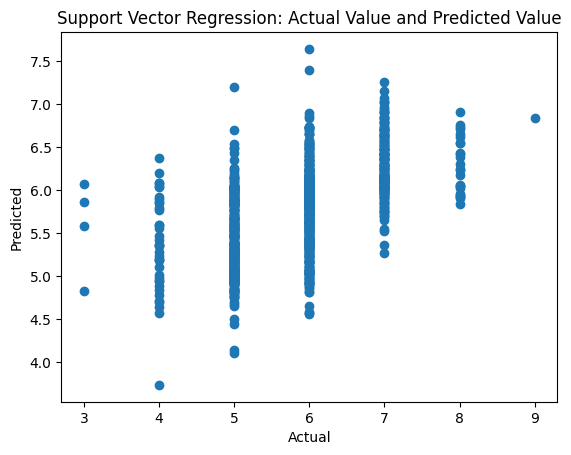

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regression: Actual Value and Predicted Value')
plt.show()

####Plot regression model line


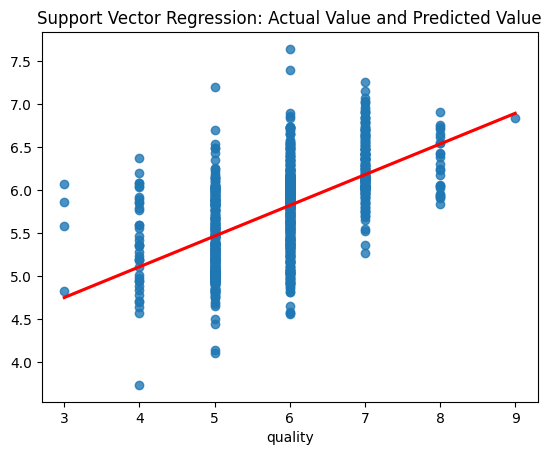

In [ ]:
plt.title('Support Vector Regression: Actual Value and Predicted Value')
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
plt.show()

###Decision Tree

####Create a decision tree model


In [ ]:
decision_tree = DecisionTreeRegressor()

####Train the model using training data

In [ ]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

####Make predictions using test data

In [ ]:
y_pred = decision_tree.predict(x_test)

####Evaluation

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred)
rmse_dt = root_mean_squared_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)
print("Mean Absolute Error (MAE):", mae_dt)
print("R-squared (R2):", r2_dt)

Mean Squared Error (MSE): 1.0601503759398496
Root Mean Squared Error (RMSE): 1.0296360405210423
Mean Absolute Error (MAE): 0.7048872180451128
R-squared (R2): -0.41001490852229394


####Visualize decision tree


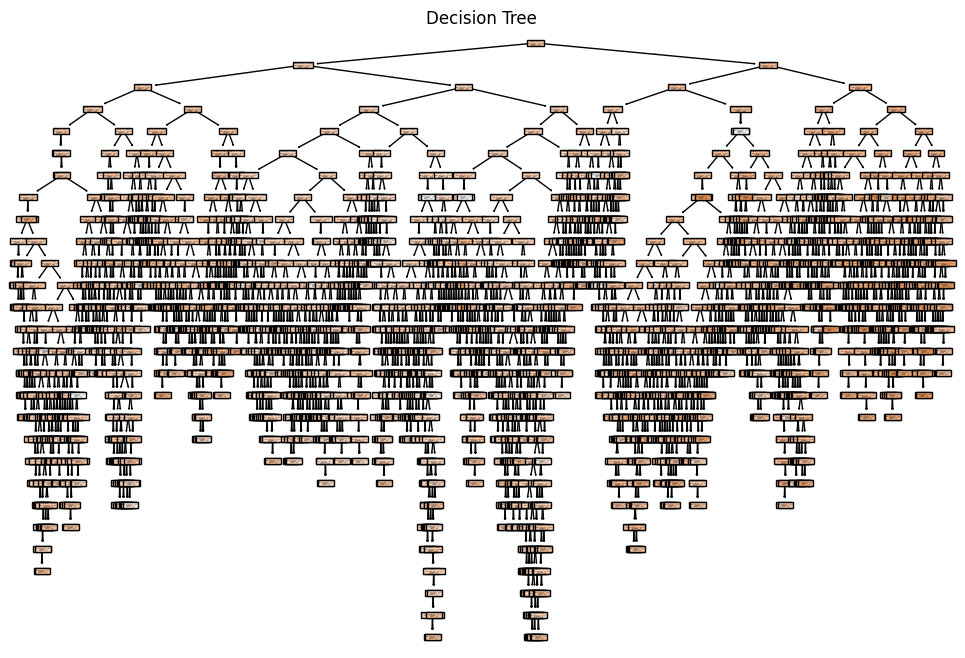

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(decision_tree , feature_names=x.columns, filled=True)
plt.title('Decision Tree')
plt.show()

###K-Nearest Neighbors

####Create a knn model

In [ ]:
knn = KNeighborsRegressor()

####Train the model using training data

In [ ]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

####Make predictions using test data

In [ ]:
y_pred = knn.predict(x_test)

####Evaluation

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = root_mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_knn)
print("Root Mean Squared Error (RMSE):", rmse_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("R-squared (R2):", r2_knn)

Mean Squared Error (MSE): 0.5639473684210526
Root Mean Squared Error (RMSE): 0.7509642923741798
Mean Absolute Error (MAE): 0.5708646616541354
R-squared (R2): 0.24994206940627917


####Plot actual and predicted values

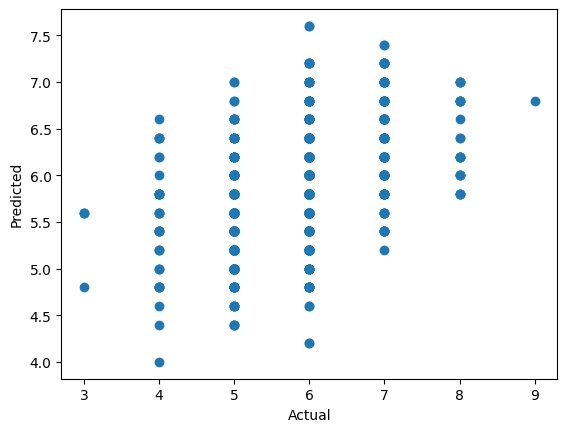

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

####Plot regression model line

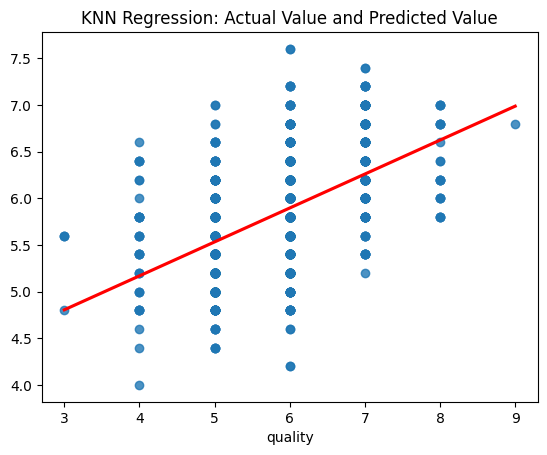

In [ ]:
plt.title('KNN Regression: Actual Value and Predicted Value')
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
plt.show()

###Random Forest

####Create a random forest model

In [ ]:
random_forest = RandomForestRegressor()

####Train the model using training data

In [ ]:
random_forest.fit(x_train, y_train)

RandomForestRegressor()

####Make predictions using test data

In [ ]:
y_pred = random_forest.predict(x_test)

####Evaluation

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = root_mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)

Mean Squared Error (MSE): 0.5159456766917294
Root Mean Squared Error (RMSE): 0.7182935866981756
Mean Absolute Error (MAE): 0.5430639097744361
R-squared (R2): 0.3137849944372062


####Visualize random forest

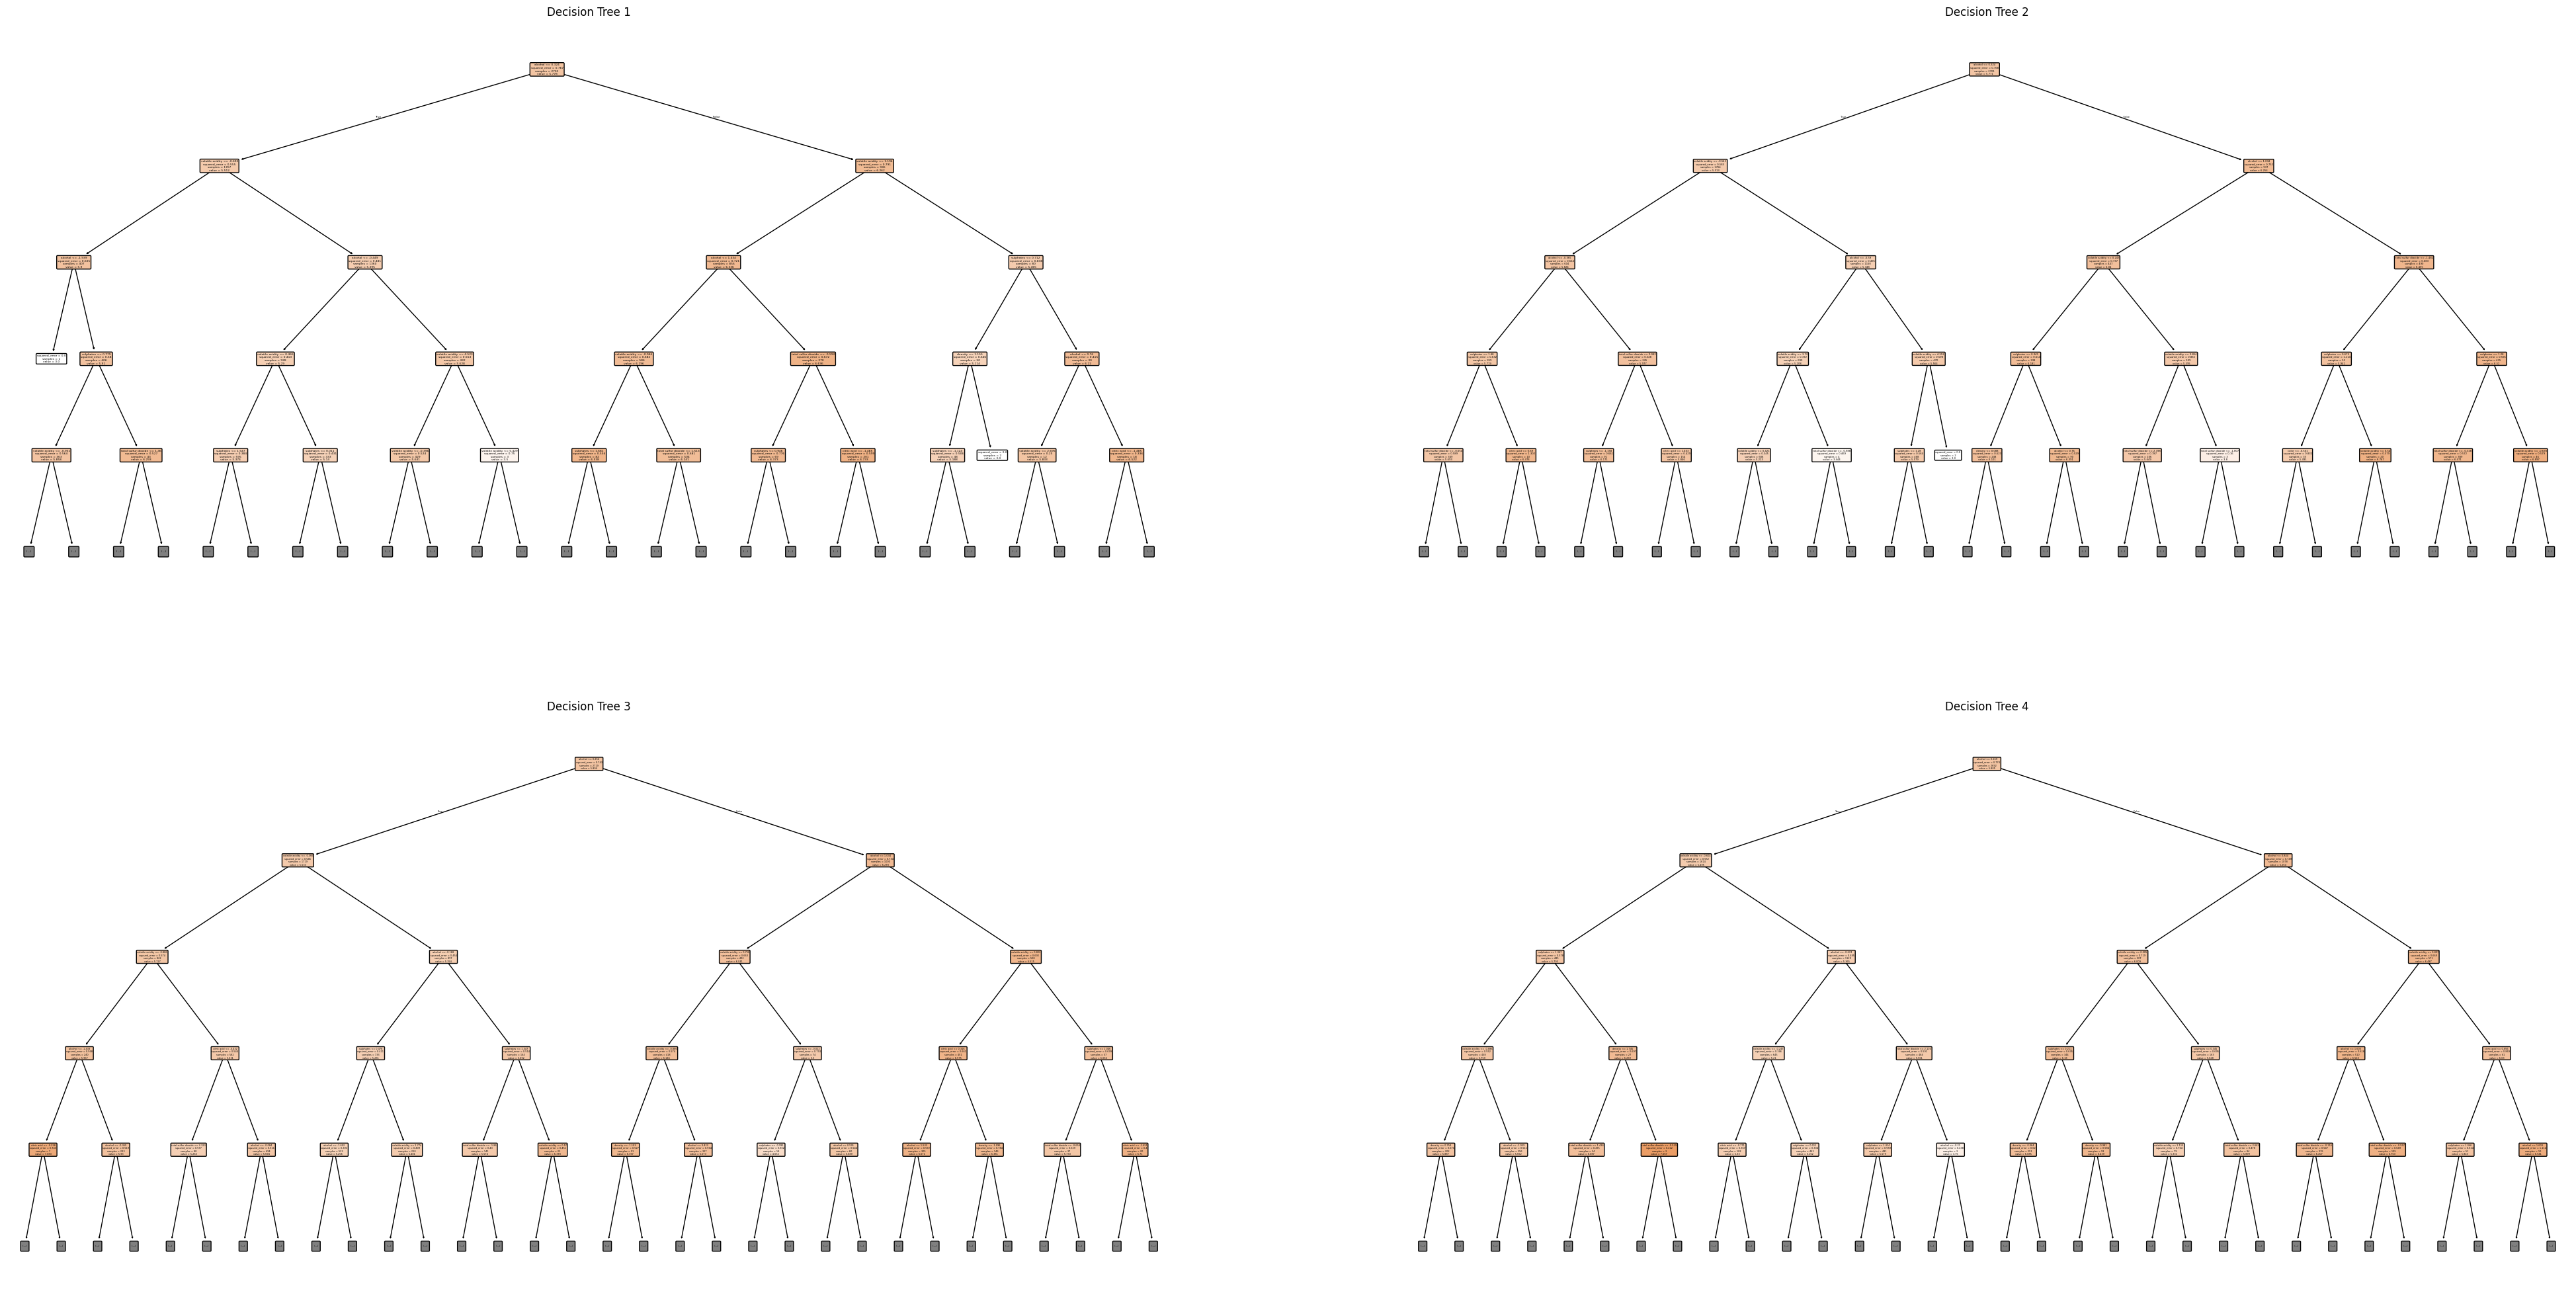

In [ ]:
plt.figure(figsize=(50, 25))
for i in range(4):
    plt.subplot(2, 2, i+1)
    tree = random_forest.estimators_[i]
    plot_tree(tree, feature_names=x.columns, filled=True, rounded=True,max_depth=4)
    plt.title(f'Decision Tree {i+1}')
plt.show()

## Perform Classification

In [ ]:
x_train_cls, x_test_cls, y_train_cls, y_test_cls = model_selection.train_test_split(
    x, y, test_size = 0.2, random_state = 42
)

x_train_cls.shape, x_test_cls.shape, y_train_cls.shape, y_test_cls.shape

((4256, 7), (1064, 7), (4256,), (1064,))

def categorize_quality(quality):
    if quality <= 5:
        return 'Low'
    elif quality == 6:
        return 'Medium'
    else:
        return 'High'
df['quality_category'] = df['quality'].apply(categorize_quality)

In [ ]:
x = df.drop(['quality'], axis=1)  # Chỉ loại bỏ cột 'quality' chứ không tạo ra cột 'quality_category'
y = df['quality']  # Sử dụng cột 'quality' làm biến mục tiêu dưới dạng liên tục

# Tách tập train và test
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size=0.2, random_state=42)


#### Create Logistic Regression model for classification

In [ ]:
logistic_regression_clf = LogisticRegression()

### Logistic Regression

#### Trainning model

In [ ]:
logistic_regression_clf.fit(x_train_cls, y_train_cls)

LogisticRegression()

#### Classification report

In [ ]:
y_pred = logistic_regression_clf.predict(x_test_cls)


print("Classification report for logistic regression:\n", classification_report(y_test_cls, y_pred))


Classification report for logistic regression:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.05      0.10        38
           5       0.60      0.60      0.60       348
           6       0.49      0.70      0.58       458
           7       0.54      0.16      0.25       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1064
   macro avg       0.38      0.22      0.22      1064
weighted avg       0.54      0.53      0.49      1064



#### Evaluation

In [ ]:
acc = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred,average='macro' )
recall = recall_score(y_test_cls, y_pred, average='macro')
f1_score_lr = f1_score(y_test_cls, y_pred, average='macro' )

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_lr)



Accuracy: 0.5291353383458647
Precision: 0.37578521428868006
Recall: 0.21684681512545104
F1-score: 0.21815282164422342


### Decision Tree

#### Create Logistic Regression model for classification

In [ ]:
decision_tree_clf = DecisionTreeClassifier()

#### Training model

In [ ]:
decision_tree_clf.fit(x_train_cls, y_train_cls)

DecisionTreeClassifier()

#### Classification report

In [ ]:
y_pred = decision_tree_clf.predict(x_test_cls)
print("Classification report for decision tree:\n", classification_report(y_test_cls, y_pred))

Classification report for decision tree:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.13      0.16      0.14        38
           5       0.53      0.51      0.52       348
           6       0.49      0.50      0.49       458
           7       0.41      0.39      0.40       190
           8       0.10      0.12      0.11        25
           9       0.00      0.00      0.00         1

    accuracy                           0.46      1064
   macro avg       0.24      0.24      0.24      1064
weighted avg       0.46      0.46      0.46      1064



#### Evaluation

In [ ]:
acc = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred, average='macro')
recall = recall_score(y_test_cls, y_pred, average='macro')
f1_score_dt = f1_score(y_test_cls, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_dt)

Accuracy: 0.4567669172932331
Precision: 0.2360217636459217
Recall: 0.23839267646604842
F1-score: 0.2367740192698686


###K-Nearest Neighbors

#### Create KNN model for classification

In [ ]:
knn_clf = KNeighborsClassifier()

#### Training model

In [ ]:
knn_clf.fit(x_train_cls, y_train_cls)

KNeighborsClassifier()

#### Classification report

In [ ]:
y_pred = knn_clf.predict(x_test_cls)
print("Classification report for KNN:\n", classification_report(y_test_cls, y_pred))

Classification report for KNN:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.31      0.21      0.25        38
           5       0.56      0.62      0.59       348
           6       0.51      0.60      0.55       458
           7       0.50      0.28      0.36       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.52      1064
   macro avg       0.27      0.24      0.25      1064
weighted avg       0.50      0.52      0.50      1064



#### Evaluation

In [ ]:
acc = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred, average='macro')
recall = recall_score(y_test_cls, y_pred, average='macro')
f1_score_knn = f1_score(y_test_cls, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_knn)

Accuracy: 0.5197368421052632
Precision: 0.2686181424999816
Recall: 0.24468334667416922
F1-score: 0.24990377766535474


### Random Forest

#### Create Random forest model for classification

In [ ]:
random_forest_clf = RandomForestClassifier()

#### Training model

In [ ]:
random_forest_clf.fit(x_train_cls, y_train_cls)

RandomForestClassifier()

#### Classification report

In [ ]:
y_pred = random_forest_clf.predict(x_test_cls)
print("Classification report for random forest:\n", classification_report(y_test_cls, y_pred))

Classification report for random forest:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.45      0.13      0.20        38
           5       0.61      0.62      0.62       348
           6       0.52      0.68      0.59       458
           7       0.56      0.32      0.40       190
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1064
   macro avg       0.31      0.25      0.26      1064
weighted avg       0.54      0.56      0.54      1064



#### Evaluation

In [ ]:
acc = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred, average='macro')
recall = recall_score(y_test_cls, y_pred, average='macro')
f1_score_rf = f1_score(y_test_cls, y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_rf)

Accuracy: 0.5554511278195489
Precision: 0.3073425363144989
Recall: 0.2491748306166712
F1-score: 0.25922018718415657


##Comparison models

###Comparison for regression

####Comparison by MSE evaluation

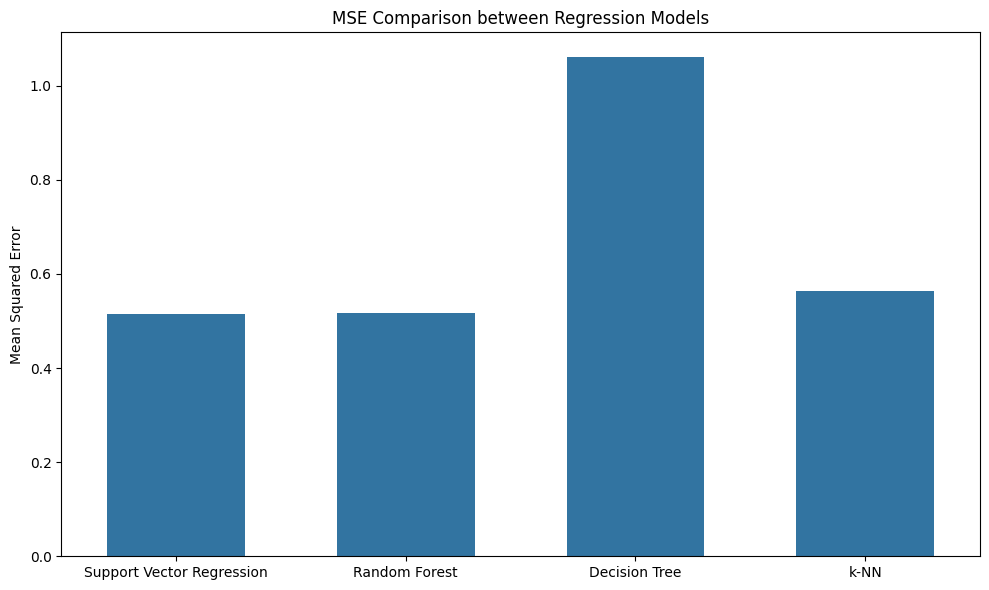

In [ ]:
models_regression = ['Support Vector Regression', 'Random Forest', 'Decision Tree', 'k-NN']

mse_regression = [
    mse_svr,
    mse_rf,
    mse_dt,
    mse_knn
]

plt.figure(figsize=(10,6))
sns.barplot(x=models_regression, y=mse_regression, width=0.6)
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison between Regression Models')
plt.xticks(ticks=range(len(models_regression)), labels=models_regression, rotation=0)
plt.tight_layout()
plt.show()

####Comparison by RMSE evaluation

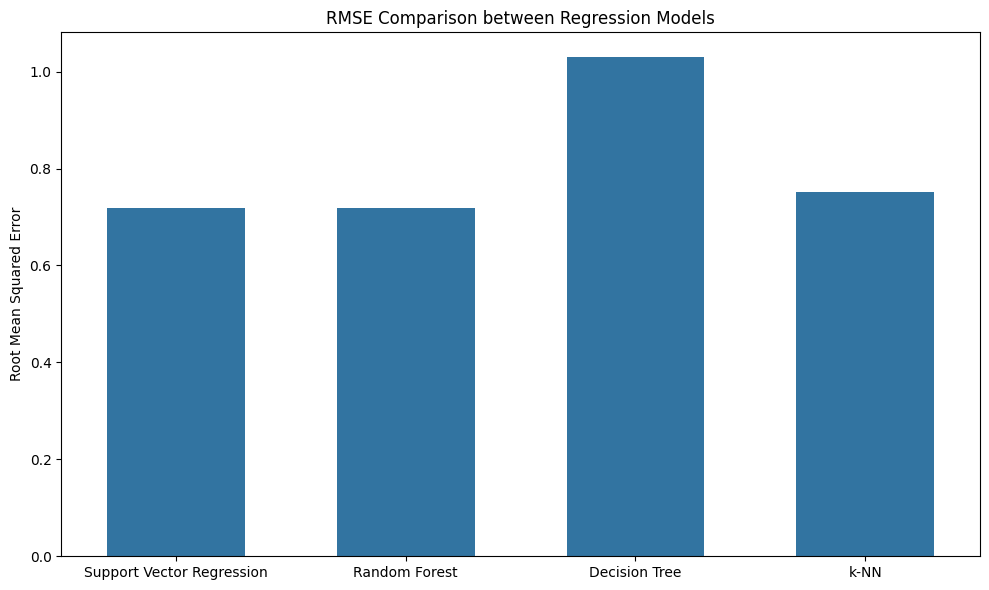

In [ ]:
models_regression = ['Support Vector Regression', 'Random Forest', 'Decision Tree', 'k-NN']

rmse_regression = [
    rmse_svr,
    rmse_rf,
    rmse_dt,
    rmse_knn
]

plt.figure(figsize=(10,6))
sns.barplot(x=models_regression, y=rmse_regression, width=0.6)
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE Comparison between Regression Models')
plt.xticks(ticks=range(len(models_regression)), labels=models_regression, rotation=0)
plt.tight_layout()
plt.show()

####Comparison by MAE evaluation

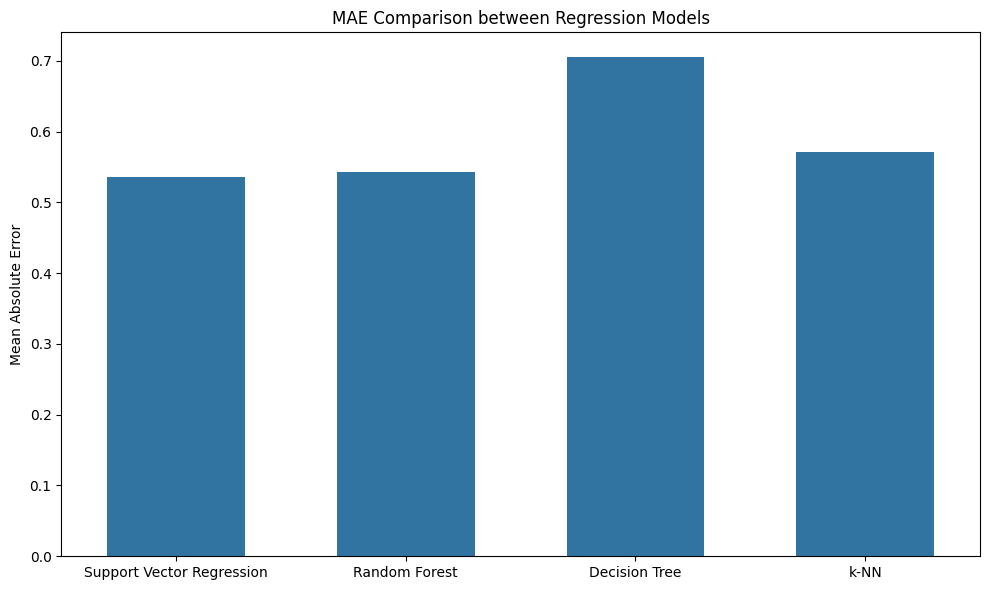

In [ ]:
models_regression = ['Support Vector Regression', 'Random Forest', 'Decision Tree', 'k-NN']

mae_regression = [
    mae_svr,
    mae_rf,
    mae_dt,
    mae_knn
]

plt.figure(figsize=(10,6))
sns.barplot(x=models_regression, y=mae_regression, width=0.6)
plt.ylabel('Mean Absolute Error')
plt.title('MAE Comparison between Regression Models')
plt.xticks(ticks=range(len(models_regression)), labels=models_regression, rotation=0)
plt.tight_layout()
plt.show()

####Comparison by R2 evaluation

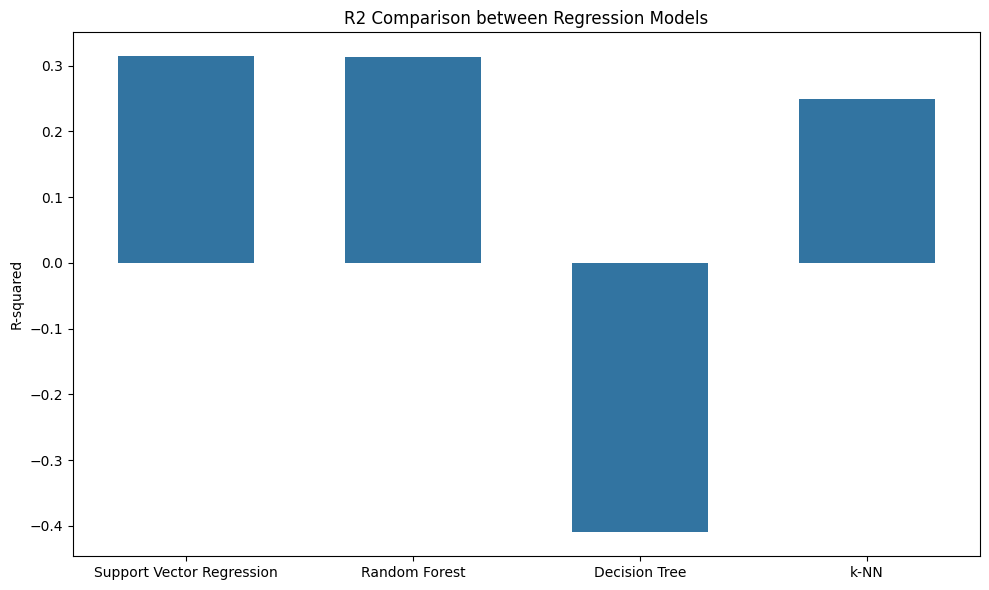

In [ ]:
models_regression = ['Support Vector Regression', 'Random Forest', 'Decision Tree', 'k-NN']

r2_regression = [
    r2_svr,
    r2_rf,
    r2_dt,
    r2_knn
]

plt.figure(figsize=(10,6))
sns.barplot(x=models_regression, y=r2_regression, width=0.6)
plt.ylabel('R-squared')
plt.title('R2 Comparison between Regression Models')
plt.xticks(ticks=range(len(models_regression)), labels=models_regression, rotation=0)
plt.tight_layout()
plt.show()

###Comparison for classification

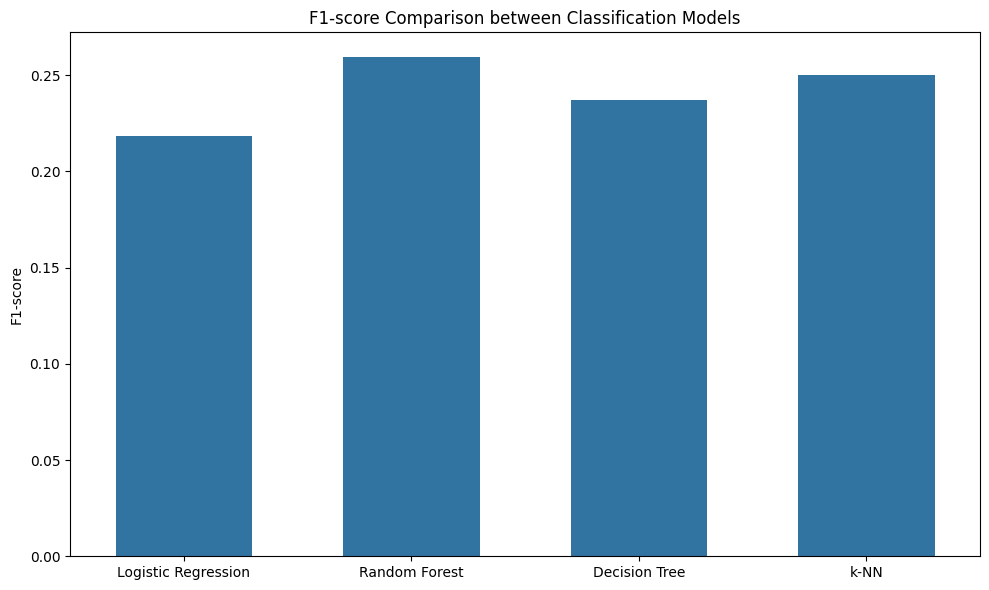

In [ ]:
models_classification = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'k-NN']

f1_score_list = [
    f1_score_lr,
    f1_score_rf,
    f1_score_dt,
    f1_score_knn
]

plt.figure(figsize=(10,6))
sns.barplot(x=models_classification, y=f1_score_list, width=0.6)
plt.ylabel('F1-score')
plt.title('F1-score Comparison between Classification Models')
plt.xticks(ticks=range(len(models_classification)), labels=models_classification, rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# To store results
rf_accuracies = []
dt_accuracies = []
knn_accuracies = []
lr_accuracies = []

In [ ]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    x_train_cls, x_test_cls = x.iloc[train_index], x.iloc[test_index]
    y_train_cls, y_test_cls = y.iloc[train_index], y.iloc[test_index]

    # Random Forest
    random_forest_clf.fit(x_train_cls, y_train_cls)
    y_pred_rf = random_forest_clf.predict(x_test_cls)
    rf_accuracies.append(accuracy_score(y_test_cls, y_pred_rf))

    # Decision Tree Bayes
    decision_tree_clf.fit(x_train_cls, y_train_cls)
    y_pred_dt = decision_tree_clf.predict(x_test_cls)
    dt_accuracies.append(accuracy_score(y_test_cls, y_pred_dt))

    # K-Nearest Neighbors
    knn_clf.fit(x_train_cls, y_train_cls)
    y_pred_knn = knn_clf.predict(x_test_cls)
    knn_accuracies.append(accuracy_score(y_test_cls, y_pred_knn))

    # Logistic Regression
    logistic_regression_clf.fit(x_train_cls, y_train_cls)
    y_pred_lr = logistic_regression_clf.predict(x_test_cls)
    lr_accuracies.append(accuracy_score(y_test_cls, y_pred_lr))

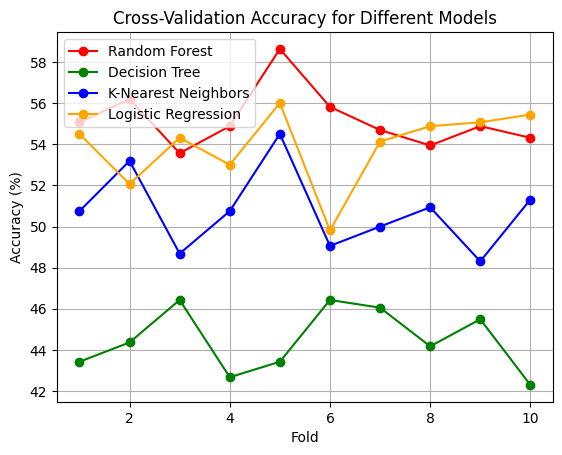

In [ ]:
folds = range(1, len(rf_accuracies) + 1)  # Adjust to match the length of rf_accuracies (or any other list)


rf_accuracies = [x * 100 for x in rf_accuracies]
dt_accuracies = [x * 100 for x in dt_accuracies]
knn_accuracies = [x * 100 for x in knn_accuracies]
lr_accuracies = [x * 100 for x in lr_accuracies]
min_length = min(len(folds), len(rf_accuracies), len(dt_accuracies), len(knn_accuracies), len(lr_accuracies))

folds = folds[:min_length]
rf_accuracies = rf_accuracies[:min_length]
dt_accuracies = dt_accuracies[:min_length]
knn_accuracies = knn_accuracies[:min_length]
lr_accuracies = lr_accuracies[:min_length]

plt.plot(folds, rf_accuracies, label='Random Forest', color='red', marker='o', linestyle='-')
plt.plot(folds, dt_accuracies, label='Decision Tree', color='green', marker='o', linestyle='-')
plt.plot(folds, knn_accuracies, label='K-Nearest Neighbors', color='blue', marker='o', linestyle='-')
plt.plot(folds, lr_accuracies, label='Logistic Regression', color='orange', marker='o', linestyle='-')

plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Cross-Validation Accuracy for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

## Apply solving overfitting for Regression problem

In [ ]:
# Regression models
svr_new = SVR(kernel='rbf', C=1, epsilon=0.1)

# 2. Decision Tree with pruning (limit max depth and min samples split)
decision_tree_new = DecisionTreeRegressor(max_depth=1, min_samples_split=2)

# 3. KNN with larger K value
knn_new = KNeighborsRegressor(n_neighbors=10)

# 4. Random Forest with limited depth and number of features
random_forest_new = RandomForestRegressor(n_estimators=500, max_depth=15, max_features='sqrt')

# Classification models
logistic_regression_clf_new = LogisticRegression(C=100,max_iter=1000, solver='saga')
decision_tree_clf_new = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
knn_clf_new = KNeighborsClassifier(n_neighbors=100)
random_forest_clf_new = RandomForestClassifier(n_estimators=500, max_depth=15, max_features='sqrt')


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Re-Train models

In [ ]:
# regression model train
svr_new.fit(x_train, y_train)
decision_tree_new.fit(x_train, y_train)
knn_new.fit(x_train, y_train)
random_forest_new.fit(x_train, y_train)


# Train classification models
logistic_regression_clf_new.fit(x_train_cls, y_train_cls)
decision_tree_clf_new.fit(x_train_cls, y_train_cls)
knn_clf_new.fit(x_train_cls, y_train_cls)
random_forest_clf_new.fit(x_train_cls, y_train_cls)


RandomForestClassifier(max_depth=15, n_estimators=500)

## New predict

In [ ]:
y_pred_svr_new = svr_new.predict(x_test)
y_pred_decision_tree_new = decision_tree_new.predict(x_test)
y_pred_knn_new = knn_new.predict(x_test)
y_pred_random_forest_new = random_forest_new.predict(x_test)

# F1-score prediction
y_pred_rf_cls_new = random_forest_clf_new.predict(x_test_cls)
y_pred_dt_cls_new = decision_tree_clf_new.predict(x_test_cls)
y_pred_knn_cls_new = knn_clf_new.predict(x_test_cls)
y_pred_lr_cls_new = logistic_regression_clf_new.predict(x_test_cls)

## New Evaluate

In [ ]:
#MSE
mse_dt_new = mean_squared_error(y_test, y_pred_decision_tree_new)
mse_knn_new = mean_squared_error(y_test, y_pred_knn_new)
mse_rf_new = mean_squared_error(y_test, y_pred_random_forest_new)
mse_svr_new = mean_squared_error(y_test, y_pred_svr_new)
print("New MSE of all regression models:")
print("Support Vector Regression:", mse_svr_new)
print("Decision Tree:", mse_dt_new)
print("KNN:", mse_knn_new)
print("Random Forest:", mse_rf_new)
print()

#RMSE
rmse_svr_new = root_mean_squared_error(y_test,y_pred_svr_new)
rmse_dt_new = root_mean_squared_error(y_test,y_pred_decision_tree_new)
rmse_knn_new = root_mean_squared_error(y_test,y_pred_knn_new)
rmse_rf_new = root_mean_squared_error(y_test,y_pred_random_forest_new)
print("New RMSE of all regression models:")
print("Support Vector Regression:", rmse_svr_new)
print("Decision Tree:", rmse_dt_new)
print("KNN:", rmse_knn_new)
print("Random Forest:", rmse_rf_new)
print()

#MAE
mae_rf_new = mean_absolute_error(y_test, y_pred_random_forest_new)
mae_dt_new = mean_absolute_error(y_test, y_pred_decision_tree_new)
mae_knn_new = mean_absolute_error(y_test, y_pred_knn_new)
mae_svr_new = mean_absolute_error(y_test, y_pred_svr_new)
print("New MAE of all regression models:")
print("Support Vector Regression:", mae_svr_new)
print("Decision Tree:", mae_dt_new)
print("KNN:", mae_knn_new)
print("Random Forest:", mae_rf_new)
print()

#R-Squared
r2_rf_new = r2_score(y_test, y_pred_random_forest_new)
r2_dt_new = r2_score(y_test, y_pred_decision_tree_new)
r2_knn_new = r2_score(y_test, y_pred_knn_new)
r2_svr_new = r2_score(y_test, y_pred_svr_new)
print("New R2 of all regression models:")
print("Support Vector Regression:", r2_svr_new)
print("Decision Tree:", r2_dt_new)
print("KNN:", r2_knn_new)
print("Random Forest:", r2_rf_new)



New MSE of all regression models:
Support Vector Regression: 0.5070937199531032
Decision Tree: 0.636800025699776
KNN: 0.5227631578947368
Random Forest: 0.49602615081835916

New RMSE of all regression models:
Support Vector Regression: 0.7121051326546546
Decision Tree: 0.797997509833067
KNN: 0.7230236219479532
Random Forest: 0.7042912400551061

New MAE of all regression models:
Support Vector Regression: 0.5309934106571603
Decision Tree: 0.6618658470017009
KNN: 0.5554511278195489
Random Forest: 0.5410122920321319

New R2 of all regression models:
Support Vector Regression: 0.3255582213815369
Decision Tree: 0.15304701072425164
KNN: 0.3047176485653632
Random Forest: 0.340278243970083


In [ ]:
acc = accuracy_score(y_test_cls, y_pred_rf_cls_new)
precision = precision_score(y_test_cls, y_pred_rf_cls_new, average='macro')
recall = recall_score(y_test_cls, y_pred_rf_cls_new, average='macro')
f1_score_rf_new = f1_score(y_test_cls, y_pred_rf_cls_new, average='macro')

print('New evaluate for classification of Random Forest')
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_rf)

New evaluate for classification of Random Forest
Accuracy: 0.5545112781954887
Precision: 0.22286176161111929
Recall: 0.2349015118619982
F1-score: 0.25922018718415657


In [ ]:
acc = accuracy_score(y_test_cls, y_pred_dt_cls_new)
precision = precision_score(y_test_cls, y_pred_dt_cls_new, average='macro')
recall = recall_score(y_test_cls, y_pred_dt_cls_new, average='macro')
f1_score_dt_new = f1_score(y_test_cls, y_pred_dt_cls_new, average='macro')

print('New evaluate for classification of Decision Tree')
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_dt)

New evaluate for classification of Decision Tree
Accuracy: 0.5319548872180451
Precision: 0.21050459884328263
Recall: 0.22386452453321753
F1-score: 0.2367740192698686


In [ ]:
acc = accuracy_score(y_test_cls, y_pred_knn_cls_new)
precision = precision_score(y_test_cls, y_pred_knn_cls_new, average='macro')
recall = recall_score(y_test_cls, y_pred_knn_cls_new, average='macro')
f1_score_knn_new = f1_score(y_test_cls, y_pred_knn_cls_new, average='macro')

print('New evaluate for classification of KNN')
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_dt)

New evaluate for classification of KNN
Accuracy: 0.556390977443609
Precision: 0.23466817592335776
Recall: 0.22240713693601233
F1-score: 0.2367740192698686


In [ ]:
acc = accuracy_score(y_test_cls, y_pred_lr_cls_new)
precision = precision_score(y_test_cls, y_pred_lr_cls_new, average='macro')
recall = recall_score(y_test_cls, y_pred_lr_cls_new, average='macro')
f1_score_lr_new = f1_score(y_test_cls, y_pred_lr_cls_new, average='macro')

print('New evaluate for classification of Logistic Regression')
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score_dt)

New evaluate for classification of Logistic Regression
Accuracy: 0.5545112781954887
Precision: 0.28768410590042465
Recall: 0.23418887090619614
F1-score: 0.2367740192698686


## Compare before and after solve overfitting

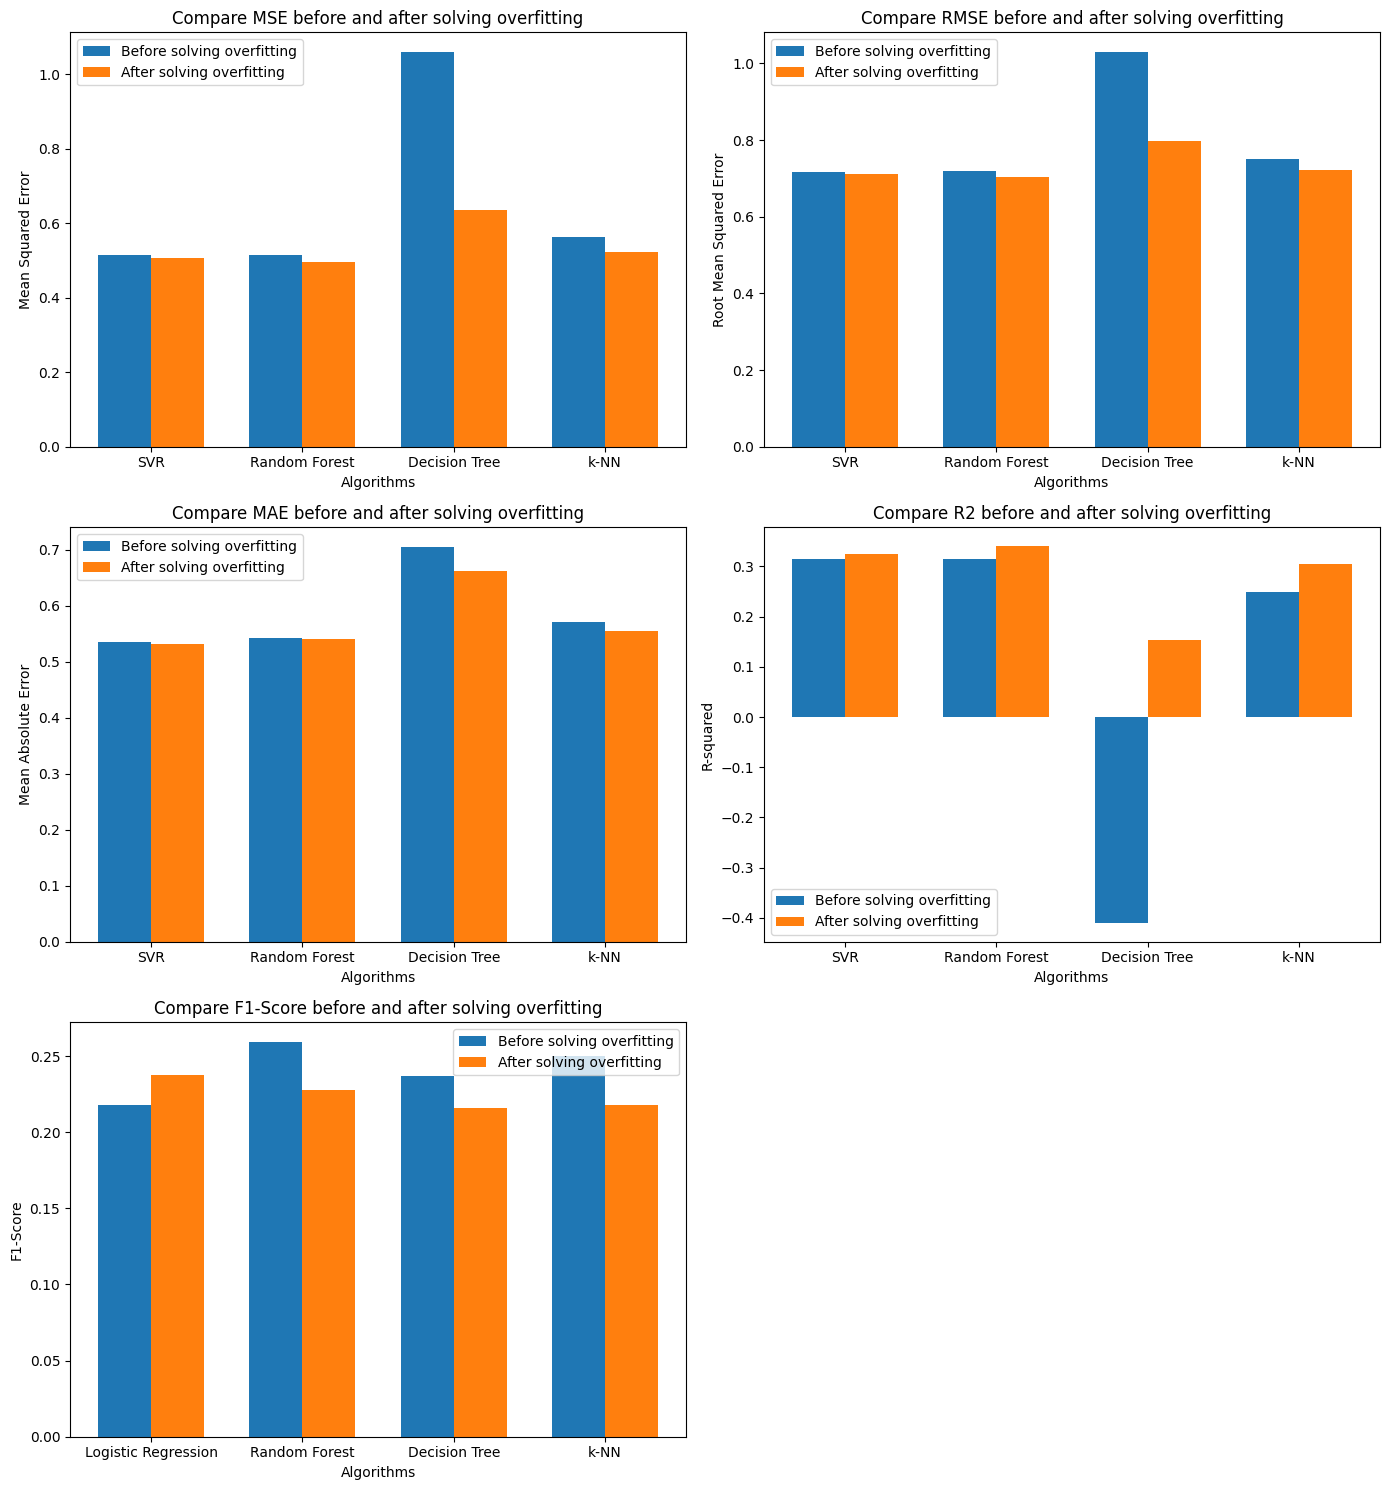

In [ ]:
models = ['SVR', 'Random Forest', 'Decision Tree', 'k-NN']
bar_width = 0.35
index = np.arange(len(models))

# Dữ liệu cho các chỉ số (MSE, RMSE, MAE, R2, F1-Score)
mse_before = [mse_svr, mse_rf, mse_dt, mse_knn]
mse_after = [mse_svr_new, mse_rf_new, mse_dt_new, mse_knn_new]

rmse_before = [rmse_svr, rmse_rf, rmse_dt, rmse_knn]
rmse_after = [rmse_svr_new, rmse_rf_new, rmse_dt_new, rmse_knn_new]

mae_before = [mae_svr, mae_rf, mae_dt, mae_knn]
mae_after = [mae_svr_new, mae_rf_new, mae_dt_new, mae_knn_new]

r2_before = [r2_svr, r2_rf, r2_dt, r2_knn]
r2_after = [r2_svr_new, r2_rf_new, r2_dt_new, r2_knn_new]

f1_score_before = [f1_score_lr, f1_score_rf, f1_score_dt, f1_score_knn]
f1_score_after = [f1_score_lr_new, f1_score_rf_new, f1_score_dt_new, f1_score_knn_new]

# Tạo một hình vẽ với 3 hàng, 2 cột (6 ô) để thêm biểu đồ F1-Score
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Biểu đồ 1: MSE
axes[0, 0].bar(index, mse_before, bar_width, label='Before solving overfitting')
axes[0, 0].bar(index + bar_width, mse_after, bar_width, label='After solving overfitting')
axes[0, 0].set_xlabel('Algorithms')
axes[0, 0].set_ylabel('Mean Squared Error')
axes[0, 0].set_title('Compare MSE before and after solving overfitting')
axes[0, 0].set_xticks(index + bar_width / 2)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()

# Biểu đồ 2: RMSE
axes[0, 1].bar(index, rmse_before, bar_width, label='Before solving overfitting')
axes[0, 1].bar(index + bar_width, rmse_after, bar_width, label='After solving overfitting')
axes[0, 1].set_xlabel('Algorithms')
axes[0, 1].set_ylabel('Root Mean Squared Error')
axes[0, 1].set_title('Compare RMSE before and after solving overfitting')
axes[0, 1].set_xticks(index + bar_width / 2)
axes[0, 1].set_xticklabels(models)
axes[0, 1].legend()

# Biểu đồ 3: MAE
axes[1, 0].bar(index, mae_before, bar_width, label='Before solving overfitting')
axes[1, 0].bar(index + bar_width, mae_after, bar_width, label='After solving overfitting')
axes[1, 0].set_xlabel('Algorithms')
axes[1, 0].set_ylabel('Mean Absolute Error')
axes[1, 0].set_title('Compare MAE before and after solving overfitting')
axes[1, 0].set_xticks(index + bar_width / 2)
axes[1, 0].set_xticklabels(models)
axes[1, 0].legend()

# Biểu đồ 4: R2
axes[1, 1].bar(index, r2_before, bar_width, label='Before solving overfitting')
axes[1, 1].bar(index + bar_width, r2_after, bar_width, label='After solving overfitting')
axes[1, 1].set_xlabel('Algorithms')
axes[1, 1].set_ylabel('R-squared')
axes[1, 1].set_title('Compare R2 before and after solving overfitting')
axes[1, 1].set_xticks(index + bar_width / 2)
axes[1, 1].set_xticklabels(models)
axes[1, 1].legend()

models_f1 = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'k-NN']
axes[2, 0].bar(index, f1_score_before, bar_width, label='Before solving overfitting')
axes[2, 0].bar(index + bar_width, f1_score_after, bar_width, label='After solving overfitting')
axes[2, 0].set_xlabel('Algorithms')
axes[2, 0].set_ylabel('F1-Score')
axes[2, 0].set_title('Compare F1-Score before and after solving overfitting')
axes[2, 0].set_xticks(index + bar_width / 2)
axes[2, 0].set_xticklabels(models_f1)
axes[2, 0].legend()


# Ẩn ô trống (axes[2, 1])
axes[2, 1].axis('off')

# Điều chỉnh layout để hiển thị hợp lý
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


## Visualize new model

### Regression

#### Decision Tree

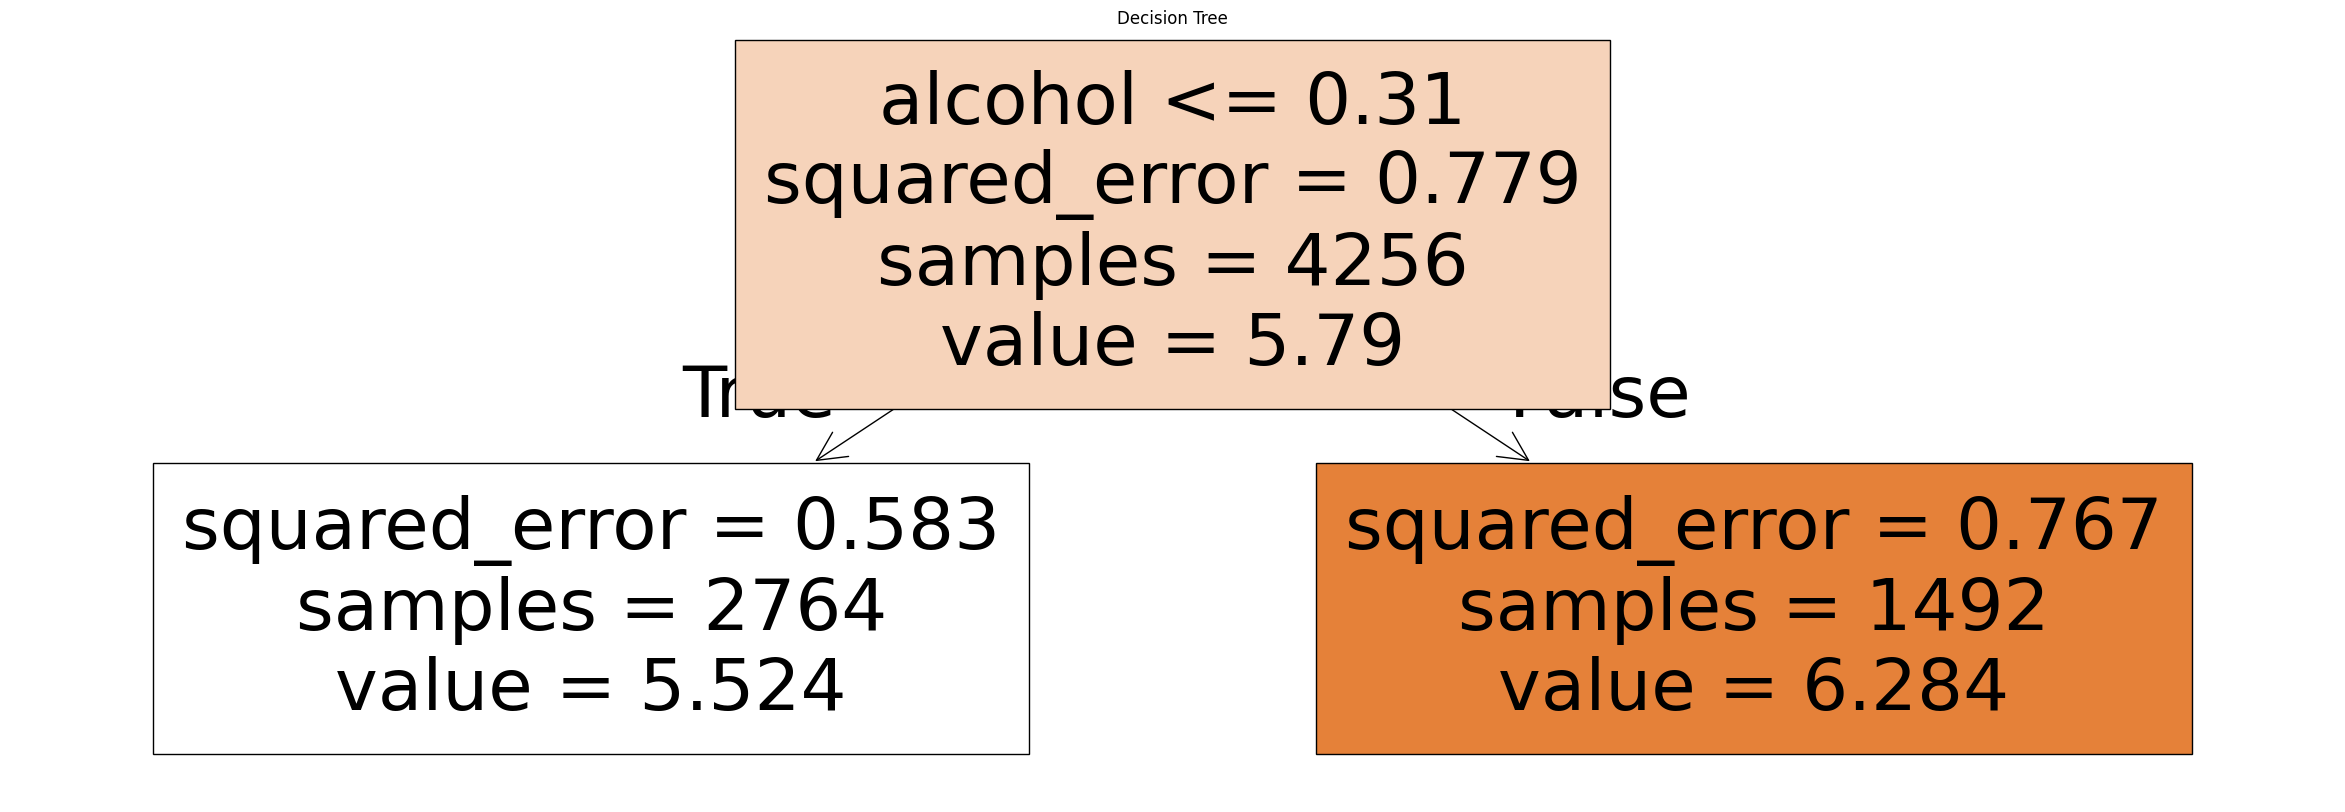

In [ ]:
plt.figure(figsize=(30, 10))
plot_tree(decision_tree_new , feature_names=x.columns, filled=True)
plt.title('Decision Tree')
plt.show()

#### SVR

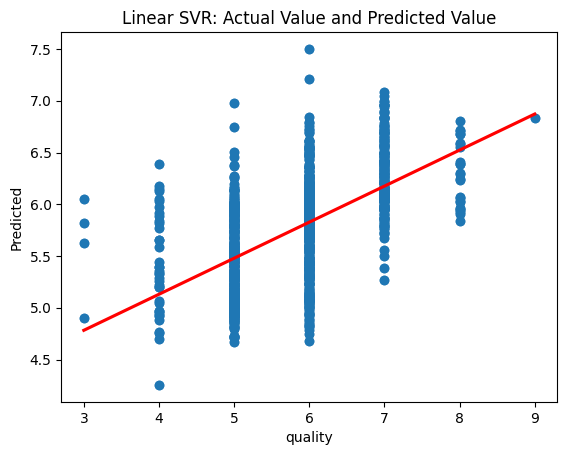

In [ ]:
plt.scatter(y_test, y_pred_svr_new)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear SVR: Actual Value and Predicted Value')
sns.regplot(x=y_test, y=y_pred_svr_new, ci=None, line_kws={'color':'red'})
plt.show()

#### Random Forest

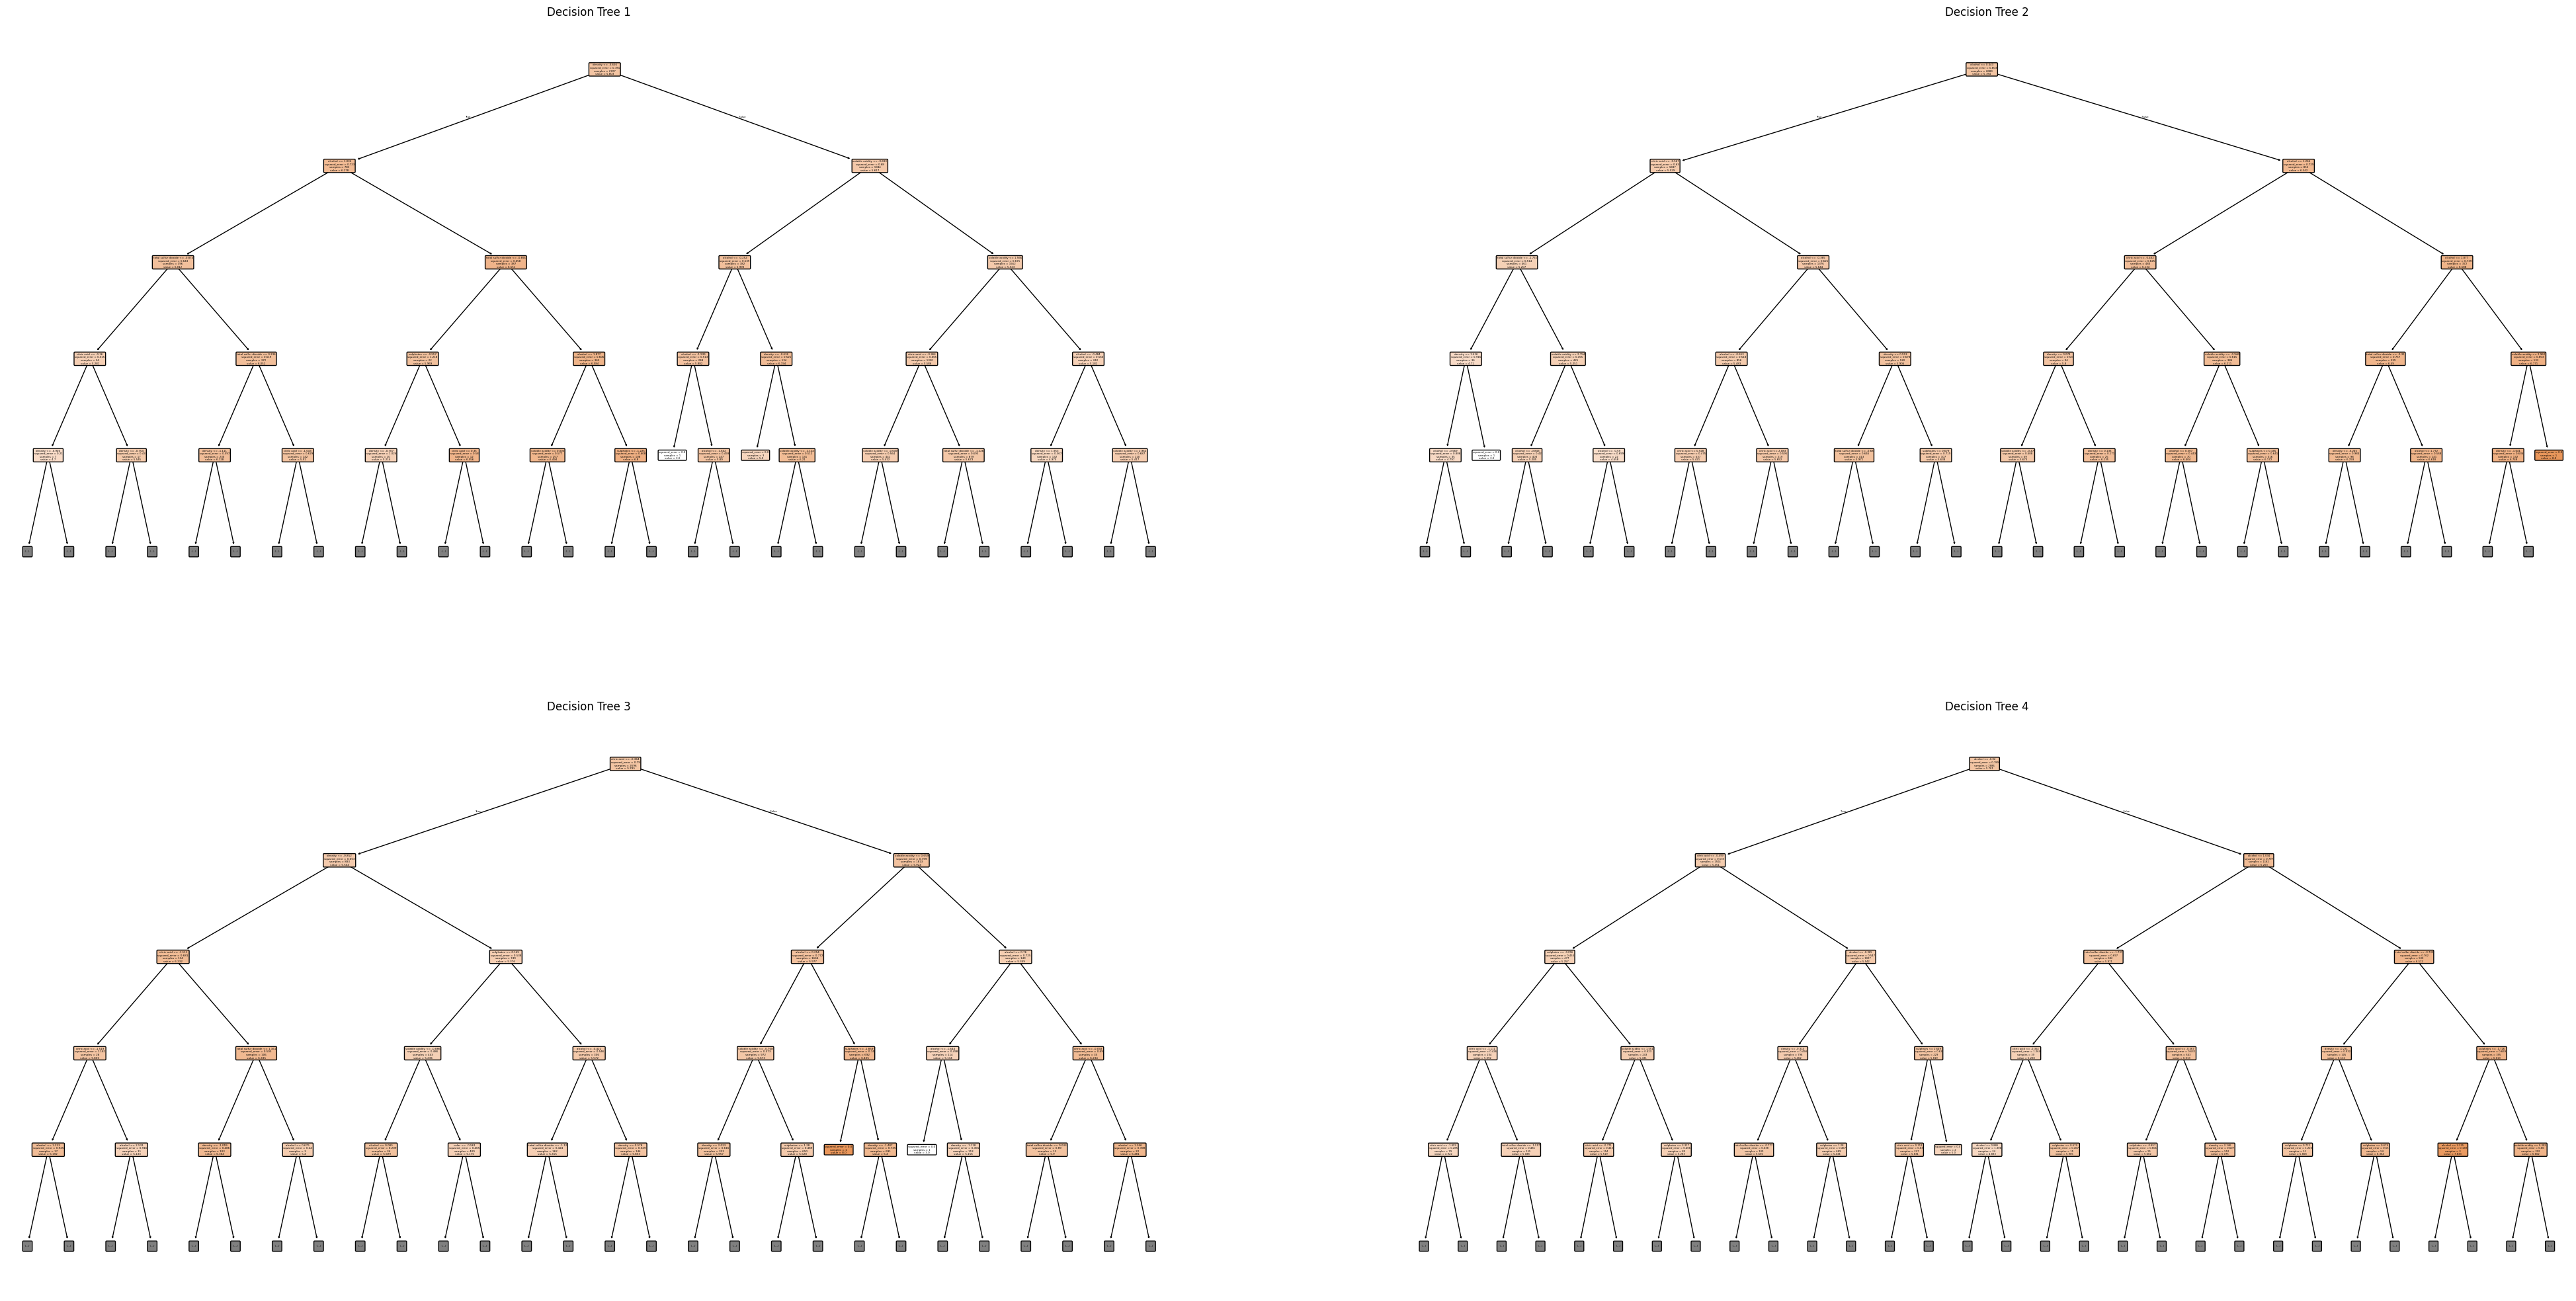

In [ ]:
plt.figure(figsize=(50, 25))
for i in range(4):
    plt.subplot(2, 2, i+1)
    tree = random_forest_new.estimators_[i]
    plot_tree(tree, feature_names=x.columns, filled=True, rounded=True,max_depth=4)
    plt.title(f'Decision Tree {i+1}')
plt.show()

#### KNN

In [ ]:
param_grid = {'n_neighbors': range(1, 20)}

# Set up the grid search
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

# Fit the model with the best k
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

Best k: 19


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn.fit(x_train_scaled, y_train)
y_pred = knn.predict(x_test_scaled)

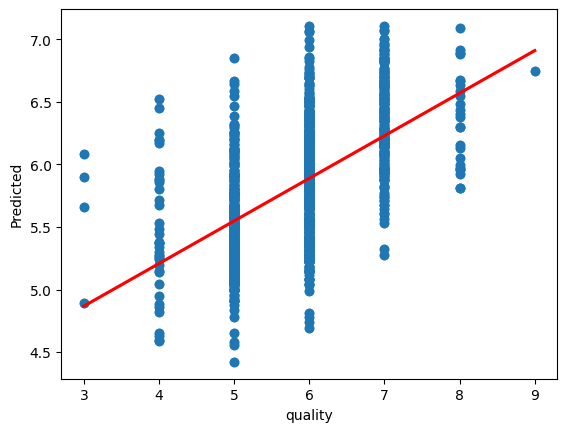

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color':'red'})
plt.show()

### Classification

In [ ]:
# Prepare K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# To store results
rf_accuracies = []
dt_accuracies = []
knn_accuracies = []
lr_accuracies = []

In [ ]:
for train_index, test_index in kf.split(x):
    x_train_cls, x_test_cls = x.iloc[train_index], x.iloc[test_index]
    y_train_cls, y_test_cls = y.iloc[train_index], y.iloc[test_index]

    # Random Forest
    random_forest_clf_new.fit(x_train_cls, y_train_cls)
    y_pred_rf = random_forest_clf_new.predict(x_test_cls)
    rf_accuracies.append(accuracy_score(y_test_cls, y_pred_rf))

    # Decision Tree Bayes
    decision_tree_clf_new.fit(x_train_cls, y_train_cls)
    y_pred_dt = decision_tree_clf_new.predict(x_test_cls)
    dt_accuracies.append(accuracy_score(y_test_cls, y_pred_dt))

    # K-Nearest Neighbors
    knn_clf_new.fit(x_train_cls, y_train_cls)
    y_pred_knn = knn_clf_new.predict(x_test_cls)
    knn_accuracies.append(accuracy_score(y_test_cls, y_pred_knn))

    # Logistic Regression
    logistic_regression_clf_new.fit(x_train_cls, y_train_cls)
    y_pred_lr = logistic_regression_clf_new.predict(x_test_cls)
    lr_accuracies.append(accuracy_score(y_test_cls, y_pred_lr))

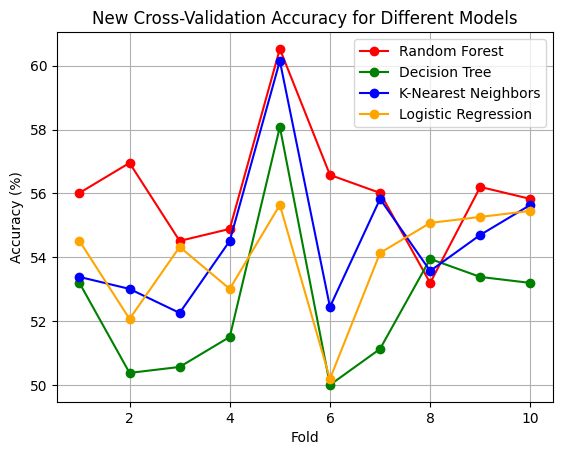

In [ ]:
rf_accuracies = [x * 100 for x in rf_accuracies]
dt_accuracies = [x * 100 for x in dt_accuracies]
knn_accuracies = [x * 100 for x in knn_accuracies]
lr_accuracies = [x * 100 for x in lr_accuracies]

folds = range(1, 11)
plt.plot(folds, rf_accuracies, label='Random Forest', color='red', marker='o', linestyle='-')
plt.plot(folds, dt_accuracies, label='Decision Tree', color='green', marker='o', linestyle='-')
plt.plot(folds, knn_accuracies, label='K-Nearest Neighbors', color='blue', marker='o', linestyle='-')
plt.plot(folds, lr_accuracies, label='Logistic Regression', color='orange', marker='o', linestyle='-')

plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('New Cross-Validation Accuracy for Different Models')
plt.legend()
plt.grid(True)
plt.show()

#Question 3

##Correlation between different features of the dataset

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                      volatile acidity  citric acid  total sulfur dioxide  \
volatile acidity              1.000000    -0.384192             -0.400716   
citric acid                  -0.384192     1.000000              0.194835   
total sulfur dioxide         -0.400716     0.194835              1.000000   
density                       0.308452     0.094758              0.006711   
sulphates                     0.227772     0.059183             -0.275836   
alcohol                      -0.065411    -0.005496             -0.249004   
quality                      -0.265205     0.097954             -0.050296   
color                        -0.645335     0.183759              0.694229   

                       density  sulphates   alcohol   quality     color  
volatile acidity      0.308452   0.227772 -0.065411 -0.265205 -0.645335  
citric acid           0.094758   0.059183 -0.005496  0.097954  0.183759  
total sulfur dioxide  0.006711  -0.275836 -0.249004 -0.050296  0.694229  
density   

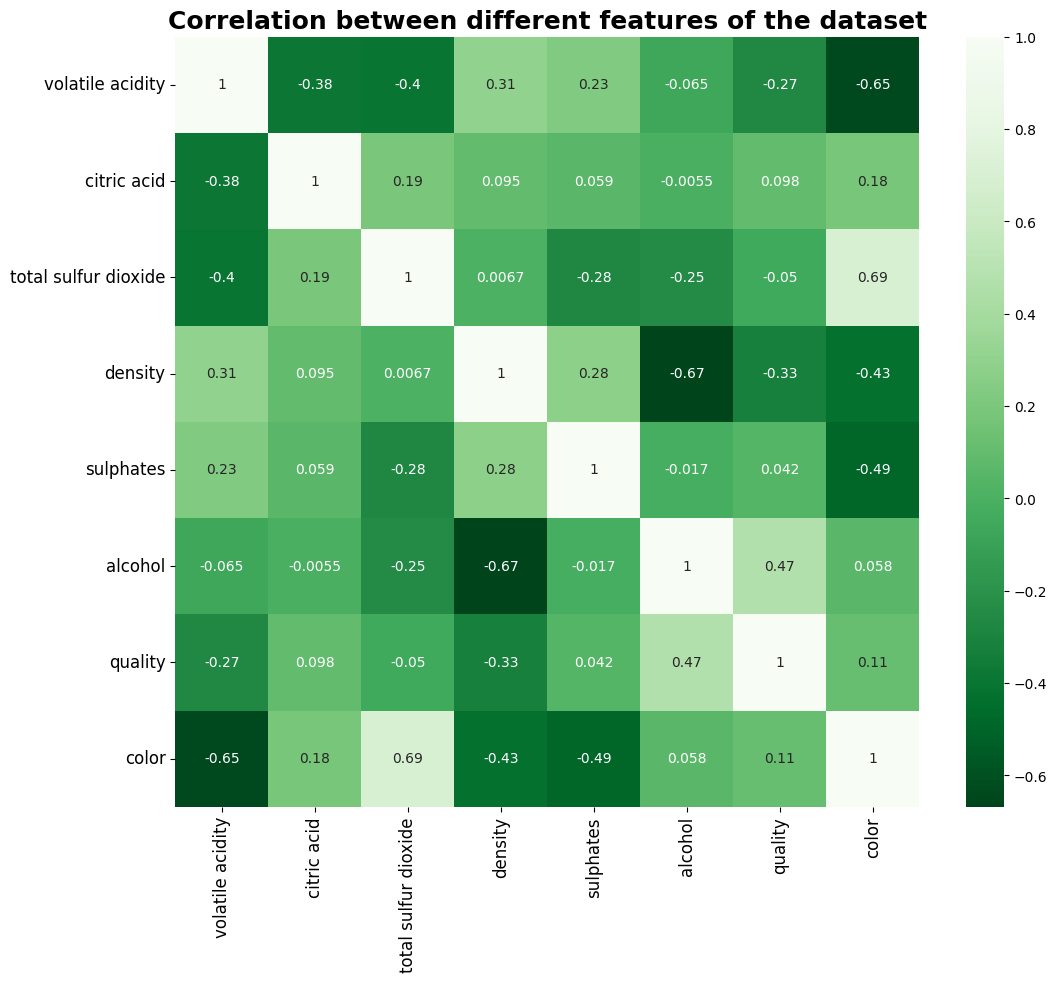

In [ ]:
plt.figure(figsize=(12, 10))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')
sns.heatmap(data=correlation_matrix, cmap='Greens_r', annot=True)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.show()

**Observation:**

* We see that most of the features are positively correlated with the **Quality Variable**.

* An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

* Numerical feautres have very low correlation.




REFERENCE : LECTURE 4 . EVALUATION REGRESSION AND CLASSIFICATION

https://www.kaggle.com/code/ahmedsho3ib/adult-income-with-logistic-regression-and-knn : PREPROCESSING AND TRAIN DATA

https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch: CORRELATION ANALYSIS